## Problem Statement
### Use Clustering Techniques for the any customer dataset using machine learning

### Clustering :
<em>Clustering algorithm is a technique that assists customer segmentation which is a process of classifying similar customers into the same segment. Clustering algorithm helps to better understand customers, in terms of both static demographics and dynamic behaviors. Customer with comparable characteristics often interact with the business similarly, thus business can benefit from this technique by creating tailored marketing strategy for each segment.</em>

## Load Libraries

In [29]:
import pandas as pd                     # for dataframe manupilation 
import numpy as np                      # for mathematical calculation
import seaborn as sns                   # for visualisation
import matplotlib.pyplot as plt         # for visualisation
import warnings

In [31]:
warnings.filterwarnings("ignore", category=Warning)

## Load Data

In [2]:
df=pd.read_csv("D:\downloads\Mall_Customers.csv")

## File Stucture and Content

In [3]:
print('We have {} rows.'.format(df.shape[0]))
print('We have {} columns'.format(df.shape[1]))
df.iloc[1,:]

We have 200 rows.
We have 5 columns


CustomerID                   2
Genre                     Male
Age                         21
Annual Income (k$)          15
Spending Score (1-100)      81
Name: 1, dtype: object

## Know the Data

In [13]:
df.head()       # prints the first five rows of the data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [15]:
df.nunique()       # prints the counnt of number of unique elements in each column

CustomerID                200
Genre                       2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

In [10]:
df.info()    # provides short summary of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## Duplicate Value
<em>When we use machine learning to teach computers how to do things, we want them to learn efficiently and make good decisions. If we have duplicated values in our data, it's like giving the robot the same instruction over and over again, which could make it act in a silly way or not learn anything new.</em>

In [5]:
df.duplicated().sum()         # to check for duplicated values present

0

## Missing values
<em>Knowing about missing values is important because they indicate how much we don’t know
about our data. Making inferences based on just a few cases is often unwise. In addition, many
modelling procedures break down when missing values are involved and the corresponding
rows will either have to be removed completely or the values need to be estimated somehow.</em>

In [8]:
df.isnull().sum()                # check whether null values present in any column

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Check for Outlier

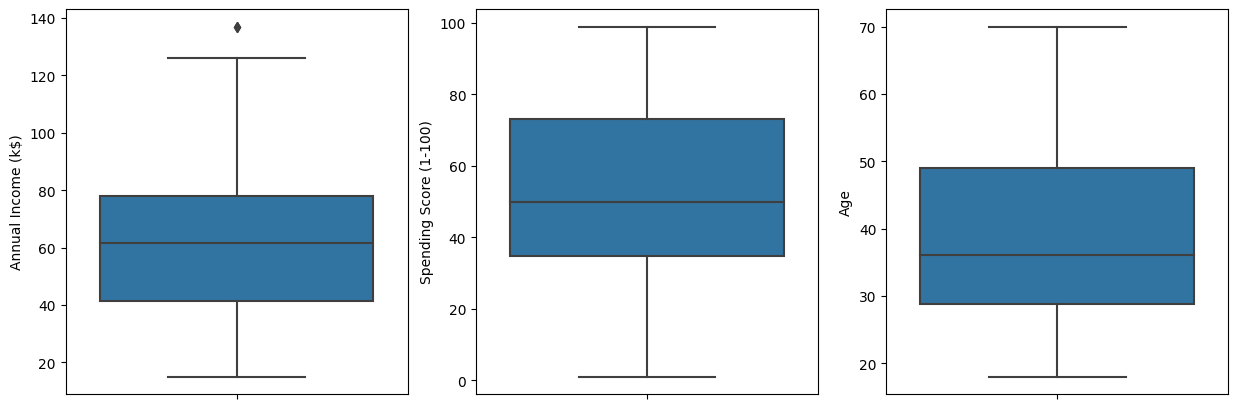

In [18]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(data=df, y="Annual Income (k$)")

plt.subplot(1,3,2)
sns.boxplot(data=df, y="Spending Score (1-100)")

plt.subplot(1,3,3)
sns.boxplot(data=df, y="Age")

plt.show()

## EDA

In [17]:
df.describe()                    #provides Statistical summary of numeric columns

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Univariate analysis

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

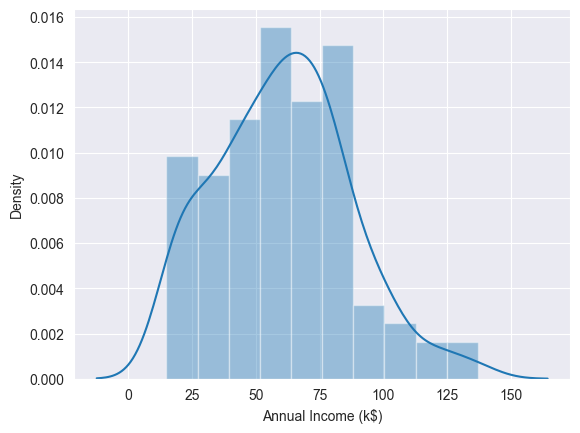

In [35]:
sns.set_style('darkgrid')
sns.distplot(df["Annual Income (k$)"] )

 * Most of the people fall under Annual Income 50k-80k

<Axes: xlabel='Spending Score (1-100)', ylabel='Density'>

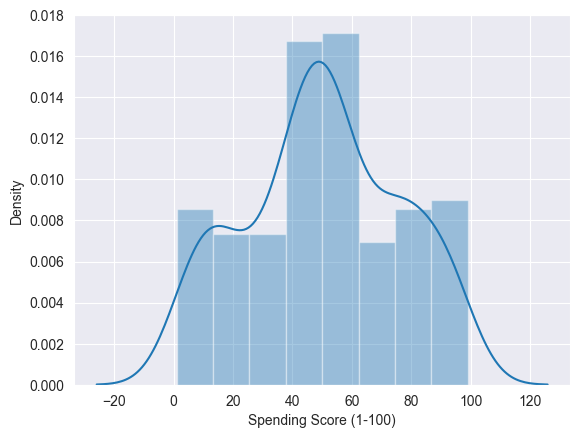

In [36]:
sns.distplot(df["Spending Score (1-100)"] )

 * Most of the peoples Spending Score lie between 40-60

<Axes: xlabel='Age', ylabel='Density'>

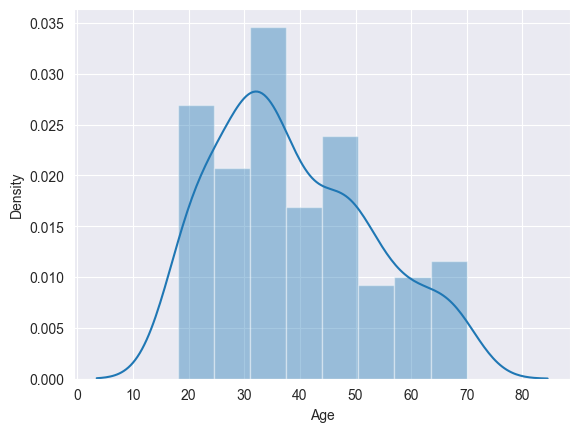

In [37]:
sns.distplot(df["Age"] )

* Most of the people ar 25-37

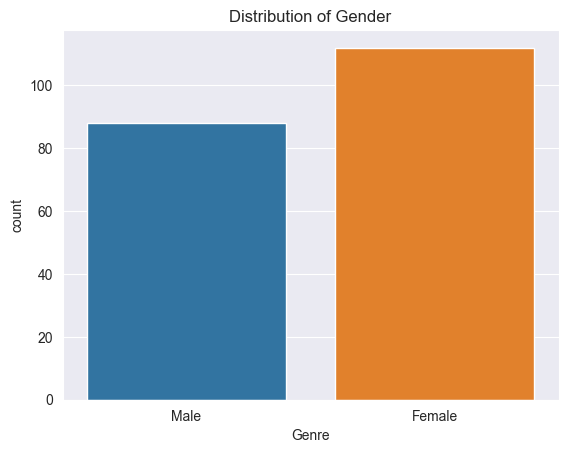

In [41]:
sns.countplot(x='Genre', data=df);
plt.title('Distribution of Gender');

* Female are More than Male
* This also speaks that most of there customers are Female

### Bivariate Analysis 

<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

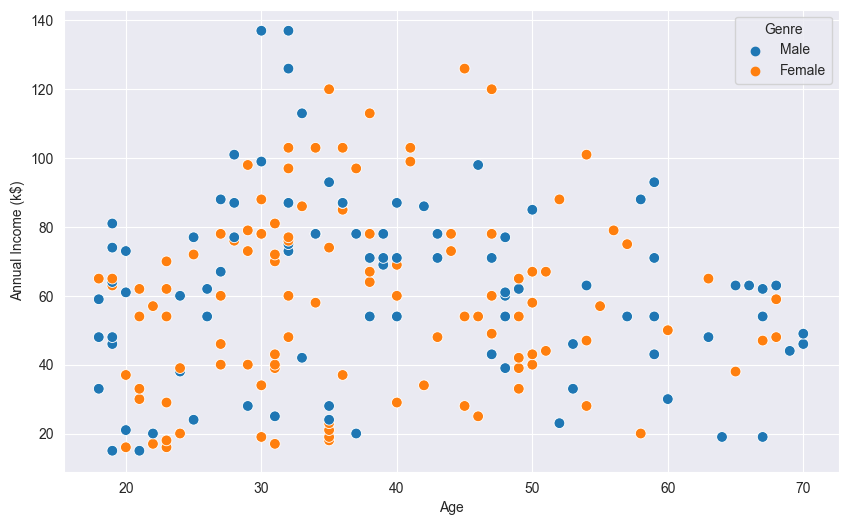

In [43]:
# Age VS Annual Income
plt.figure(figsize=(10,6))
sns.set_style('darkgrid')

sns.scatterplot(data=df, x="Age", y= "Annual Income (k$)", hue="Genre", s=60)

* Annual Income is less As Age Increases

<Axes: xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

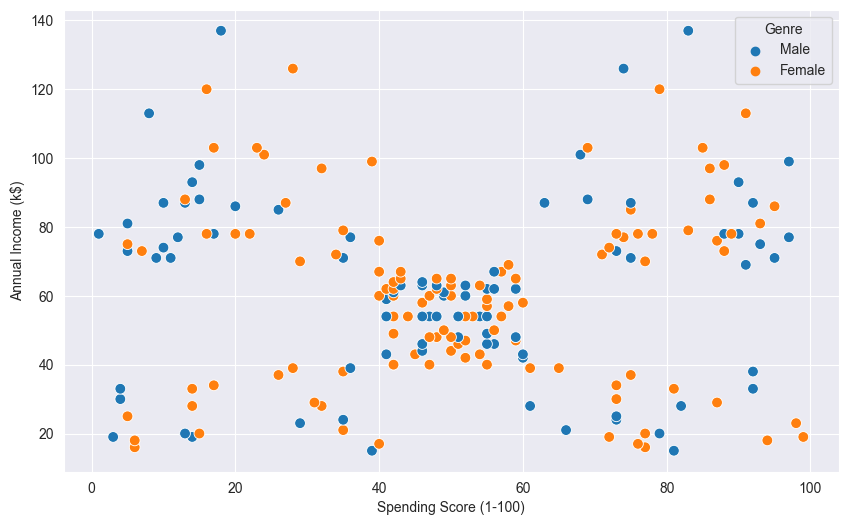

In [45]:
# Age VS Spending Score

plt.figure(figsize=(10,6))
sns.set_style('darkgrid')

sns.scatterplot(data=df, x="Spending Score (1-100)", y= "Annual Income (k$)", hue="Genre", s=60)

* Peoples whos Annual Income 40-60 has Spending Score 40-60

<Figure size 1000x900 with 0 Axes>

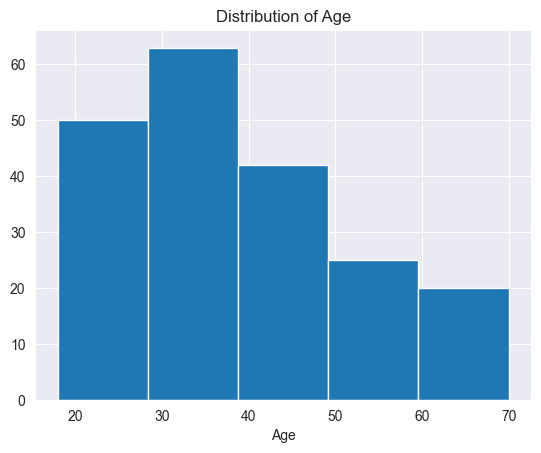

In [50]:
# Histogram of ages
plt.figure(figsize=(10,9))
df.hist('Age', bins=5);
plt.title('Distribution of Age');
plt.xlabel('Age');

<Figure size 1000x900 with 0 Axes>

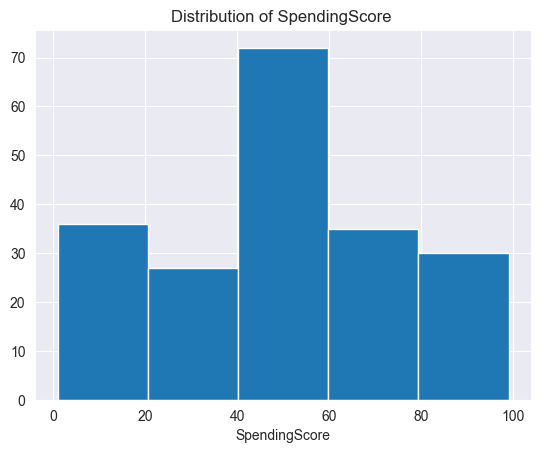

In [51]:
# Histogram of ages
plt.figure(figsize=(10,9))
df.hist('Spending Score (1-100)', bins=5);
plt.title('Distribution of SpendingScore ');
plt.xlabel('SpendingScore');

<Figure size 1000x900 with 0 Axes>

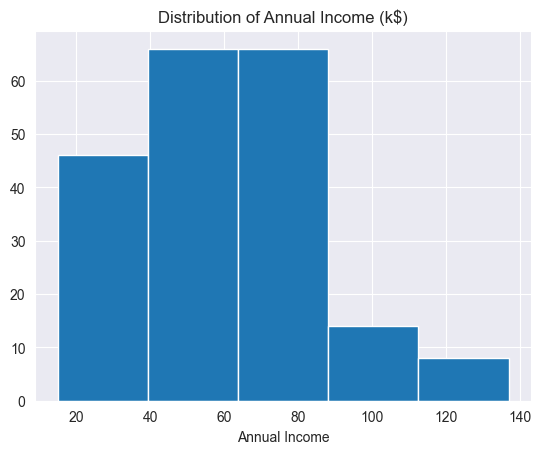

In [52]:
# Histogram of ages
plt.figure(figsize=(10,9))
df.hist('Annual Income (k$)', bins=5);
plt.title('Distribution of Annual Income (k$)');
plt.xlabel('Annual Income');

In [78]:
# Create data sets by gender
male_customers = df[df['Genre'] == 'Male']
female_customers = df[df['Genre'] == 'Female']
# Print the average spending score for men and women
print("Average Spending Score of male is :",male_customers['Spending Score (1-100)'].mean())
print("Average Spending Score of Female is :",female_customers['Spending Score (1-100)'].mean())

Average Spending Score of male is : 48.51136363636363
Average Spending Score of Female is : 51.526785714285715


* Average Spending Score is is high for Female
* As there are also More number of females in the Data

### Modeling

* K-means Clustering
* K-means Tries to minimize Intra-cluster Distance
* To maximize Inter-cluster Distance
* Must initialize k
* It is an Iterative method

In [74]:
# importing Required libraries

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs 

In [56]:
df_scaled = df[["Age","Annual Income (k$)","Spending Score (1-100)"]]

# Class instance
scaler = StandardScaler()     

# Fit_transform
df_scaled_fit = scaler.fit_transform(df_scaled)



In [57]:
df_scaled_fit = pd.DataFrame(df_scaled_fit)
df_scaled_fit.columns = ["Age","Annual Income (k$)","Spending Score (1-100)"]
df_scaled_fit.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [58]:
var_list = df_scaled_fit[["Age","Annual Income (k$)","Spending Score (1-100)"]] # chosse the columns on which to be clustered

In [59]:
var_list.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [60]:
k_means = KMeans(init = "k-means++", n_clusters = 5, n_init = 12)
k_means.fit(var_list)

KMeans(n_clusters=5, n_init=12)

In [61]:
k_means.labels_

array([3, 3, 1, 3, 3, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2, 3, 1, 3,
       1, 3, 2, 3, 3, 3, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3,
       2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3,
       3, 2, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2,
       2, 3, 0, 3, 3, 3, 2, 2, 2, 2, 3, 0, 4, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 2, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4])

In [62]:
df["Label"] = k_means.labels_
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Label
0,1,Male,19,15,39,3
1,2,Male,21,15,81,3
2,3,Female,20,16,6,1
3,4,Female,23,16,77,3
4,5,Female,31,17,40,3


In [68]:
ssd = []

for num_clusters in range(1,11):
    kmeans1 = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans1.fit(var_list)
    
    ssd.append(kmeans1.inertia_)

Text(0.5, 0, 'K Value')

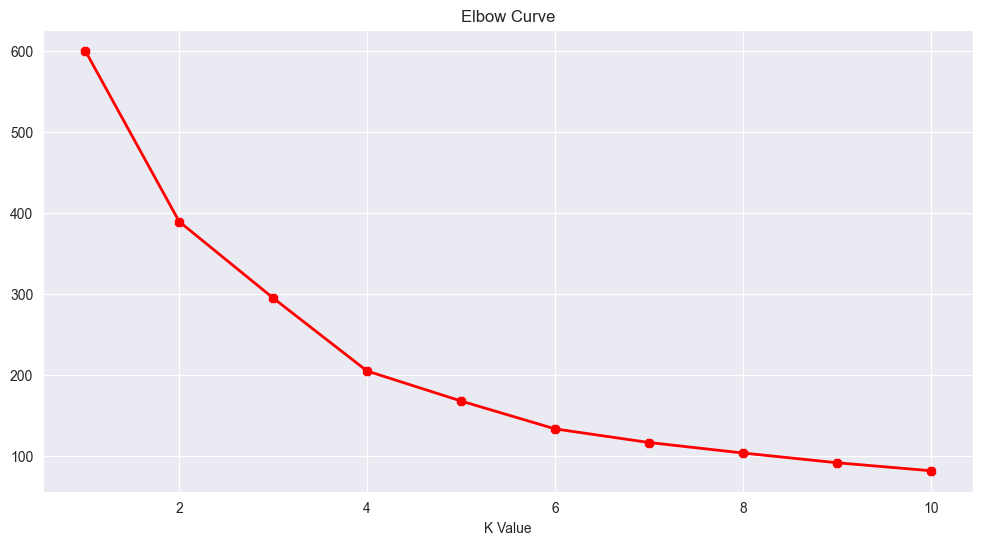

In [71]:
plt.figure(figsize=(12,6))

plt.plot(range(1,11), ssd, linewidth=2, color="red", marker ="8")
plt.title("Elbow Curve")
plt.xlabel("K Value")


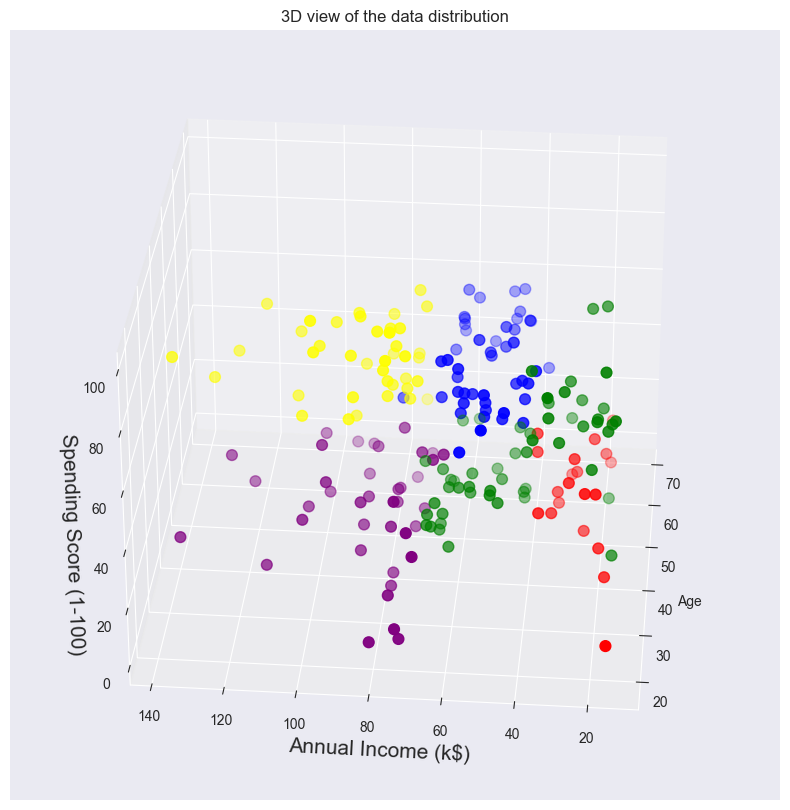

In [77]:
#3D Plot as we did the clustering on the basis of 3 input features

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.Label == 0], df["Annual Income (k$)"][df.Label == 0], df["Spending Score (1-100)"][df.Label == 0], c='purple', s=60)
ax.scatter(df.Age[df.Label == 1], df["Annual Income (k$)"][df.Label == 1], df["Spending Score (1-100)"][df.Label == 1], c='red', s=60)
ax.scatter(df.Age[df.Label == 2], df["Annual Income (k$)"][df.Label == 2], df["Spending Score (1-100)"][df.Label == 2], c='blue', s=60)
ax.scatter(df.Age[df.Label == 3], df["Annual Income (k$)"][df.Label == 3], df["Spending Score (1-100)"][df.Label == 3], c='green', s=60)
ax.scatter(df.Age[df.Label == 4], df["Annual Income (k$)"][df.Label == 4], df["Spending Score (1-100)"][df.Label == 4], c='yellow', s=60)
ax.view_init(30, 185)
plt.title("3D view of the data distribution")
plt.xlabel("Age", fontsize=10)
plt.ylabel("Annual Income (k$)", fontsize=15)
ax.set_zlabel('Spending Score (1-100)', fontsize=15)
plt.show()

In [76]:
# Print the clustered customer IDs
df.sample(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Label
13,14,Female,24,20,77,3
190,191,Female,34,103,23,0
115,116,Female,19,65,50,3
137,138,Male,32,73,73,4
173,174,Male,36,87,92,4
59,60,Male,53,46,46,2
43,44,Female,31,39,61,3
140,141,Female,57,75,5,0
54,55,Female,50,43,45,2
84,85,Female,21,54,57,3


### Clustering using only two i.e 'Annual Income (k$)' and 'Spending Score (1-100)'

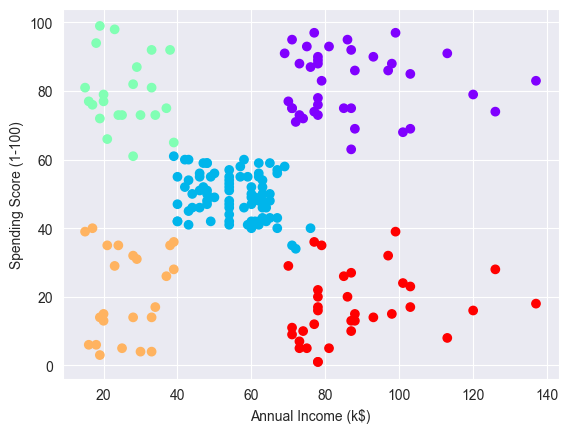

In [79]:
# Use K-means clustering to group the customers based on their annual income and spending score
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

# Visualize the clustering results using a scatterplot
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='rainbow')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

#### From these We Have 5 Class
 
1.Low income - Low Spending Score 

2.Low income - High Spending Score 

3.Moderate income - Moderate Spending Score

4.High income - Low Spending Score

5.High income - High Spending Score
